<a href="https://colab.research.google.com/github/Hataeju/Classification/blob/main/%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Classification용 데이터 준비

In [5]:
# scikit-learn toy dataset 로드
# Classification 문제를 위한 와인 종류 분류 데이터셋을 로드
wine = datasets.load_wine()

print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [6]:
# 데이터 프레임으로 변환
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
# 스케일링 (정규화)가 필요할 수도 있겠으나, 모델 개선에서 다룬다.
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


# 모델 학습

In [82]:
# 모델의 이해를 위해 Feature를 2개만 사용한다.
X = df[['alcohol', 'malic_acid','od280/od315_of_diluted_wines','proline']]
y = df['target']
#plt.scatter(df['alcohol'], df['malic_acid'], c=df['target'], s=60)

In [83]:
X

,alcohol,malic_acid,od280/od315_of_diluted_wines,proline
0,14.23,1.71,3.92,1065.0
1,13.20,1.78,3.40,1050.0
2,13.16,2.36,3.17,1185.0
3,14.37,1.95,3.45,1480.0
4,13.24,2.59,2.93,735.0
...,...,...,...,...
173,13.71,5.65,1.74,740.0
174,13.40,3.91,1.56,750.0
175,13.27,4.28,1.56,835.0
176,13.17,2.59,1.62,840.0


In [84]:
# 학습/테스트 데이터 분리
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
# 학습/평가 데이터 분리
train_sub_X, val_X, train_sub_y, val_y = train_test_split(train_X, train_y, test_size=0.4, random_state=42)

In [86]:
model = DecisionTreeClassifier(max_depth = 2,random_state=42)
model.fit(train_sub_X, train_sub_y)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'od280/od315_of_diluted_wines <= 2.19\ngini = 0.654\nsamples = 85\nvalue = [23.0, 36.0, 26.0]'),
 Text(0.25, 0.5, 'malic_acid <= 1.09\ngini = 0.185\nsamples = 29\nvalue = [0, 3, 26]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.071\nsamples = 27\nvalue = [0, 1, 26]'),
 Text(0.75, 0.5, 'alcohol <= 12.785\ngini = 0.484\nsamples = 56\nvalue = [23, 33, 0]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.252\nsamples = 27\nvalue = [23, 4, 0]')]

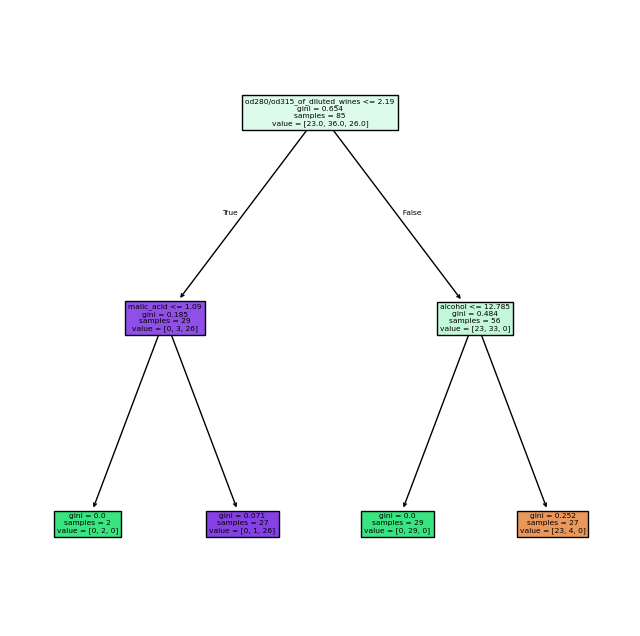

In [87]:
# 의사결정 나무 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(8,8))
plot_tree(model, filled=True, feature_names=['alcohol', 'malic_acid','od280/od315_of_diluted_wines','proline'])

# 모델 평가

In [88]:
# 모델 평가
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))

훈련 데이터셋 accuracy: 0.9411764705882353
평가용 데이터셋 accuracy: 0.8947368421052632


In [89]:
# Cross Validation 5-Fold 각각의 결과
model_cv = DecisionTreeClassifier(max_depth = 2,random_state=42)
scores= cross_validate(model_cv, train_X, train_y)
print(scores)

#from sklearn.model_selection import cross_val_score, KFold
#model_cv = DecisionTreeClassifier(max_depth = 2,random_state=42)
#scores = cross_validate(model_cv, train_sub_X, train_sub_y)
#print(scores)

{'fit_time': array([0.00606847, 0.00487614, 0.00326133, 0.00332665, 0.00325847]), 'score_time': array([0.00224781, 0.00224614, 0.0021131 , 0.00207067, 0.00361347]), 'test_score': array([0.86206897, 0.75862069, 0.89285714, 0.85714286, 0.85714286])}


In [90]:
# Cross Validation 평균 값
np.mean(scores['test_score'])

np.float64(0.8455665024630541)

# 과대적합 / 과소적합 판단

In [91]:
# 모델 학습 (max_depth= None 일 때)
model = DecisionTreeClassifier(random_state=42)
model.fit(train_sub_X, train_sub_y)
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))

훈련 데이터셋 accuracy: 1.0
평가용 데이터셋 accuracy: 0.9122807017543859


[Text(0.4444444444444444, 0.9, 'od280/od315_of_diluted_wines <= 2.19\ngini = 0.654\nsamples = 85\nvalue = [23.0, 36.0, 26.0]'),
 Text(0.2222222222222222, 0.7, 'malic_acid <= 1.09\ngini = 0.185\nsamples = 29\nvalue = [0, 3, 26]'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.3333333333333333, 0.5, 'proline <= 855.0\ngini = 0.071\nsamples = 27\nvalue = [0, 1, 26]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]'),
 Text(0.4444444444444444, 0.3, 'alcohol <= 12.37\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.7, 'alcohol <= 12.785\ngini = 0.484\nsamples = 56\nvalue = [23, 33, 0]'),
 Text(0.5555555555555556, 0.8, '  False'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 29\nvalue = [0, 29,

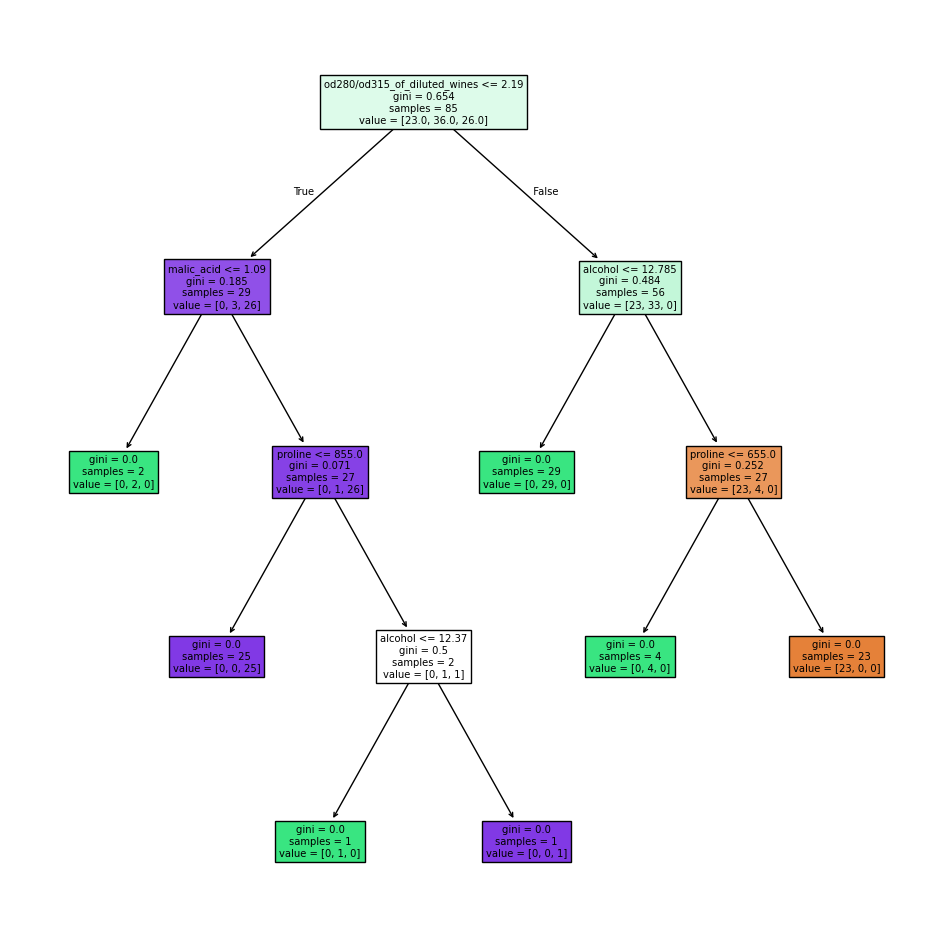

In [92]:
plt.figure(figsize=(12,12))
plot_tree(model, filled=True, feature_names=['alcohol', 'malic_acid','od280/od315_of_diluted_wines','proline'])

# 모델 개선

In [93]:
# Grid Search로 최적의 파라미터 찾기
params = {'max_depth':[1, 2, 3, 4, 5]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params)
gs.fit(train_X, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5]})

In [94]:
# 제시한 하이퍼파라미터 중 최적의 파라미터 확인
gs.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

In [95]:
# Grid Search로 찾은 최적의 파라미터로 모델 선정하기
model = gs.best_estimator_

In [96]:
# 모델 평가
scores= cross_validate(model, train_X, train_y)
np.mean(scores['test_score'])

np.float64(0.887192118226601)

# 모델 적용

In [97]:
print("테스트 데이터셋 accuracy: {}".format(model.score(test_X, test_y)))

테스트 데이터셋 accuracy: 0.8888888888888888


In [ ]:
# 최종평가


[Text(0.47058823529411764, 0.9166666666666666, 'od280/od315_of_diluted_wines <= 2.19\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.23529411764705882, 0.75, 'malic_acid <= 1.89\ngini = 0.254\nsamples = 47\nvalue = [0, 7, 40]'),
 Text(0.3529411764705882, 0.8333333333333333, 'True  '),
 Text(0.11764705882352941, 0.5833333333333334, 'proline <= 570.0\ngini = 0.496\nsamples = 11\nvalue = [0, 6, 5]'),
 Text(0.058823529411764705, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.17647058823529413, 0.4166666666666667, 'proline <= 705.0\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(0.11764705882352941, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.23529411764705882, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.35294117647058826, 0.5833333333333334, 'od280/od315_of_diluted_wines <= 2.005\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.29411764705882354, 0.4166666666666667, 'gini = 0.0\nsamples = 31\nvalue

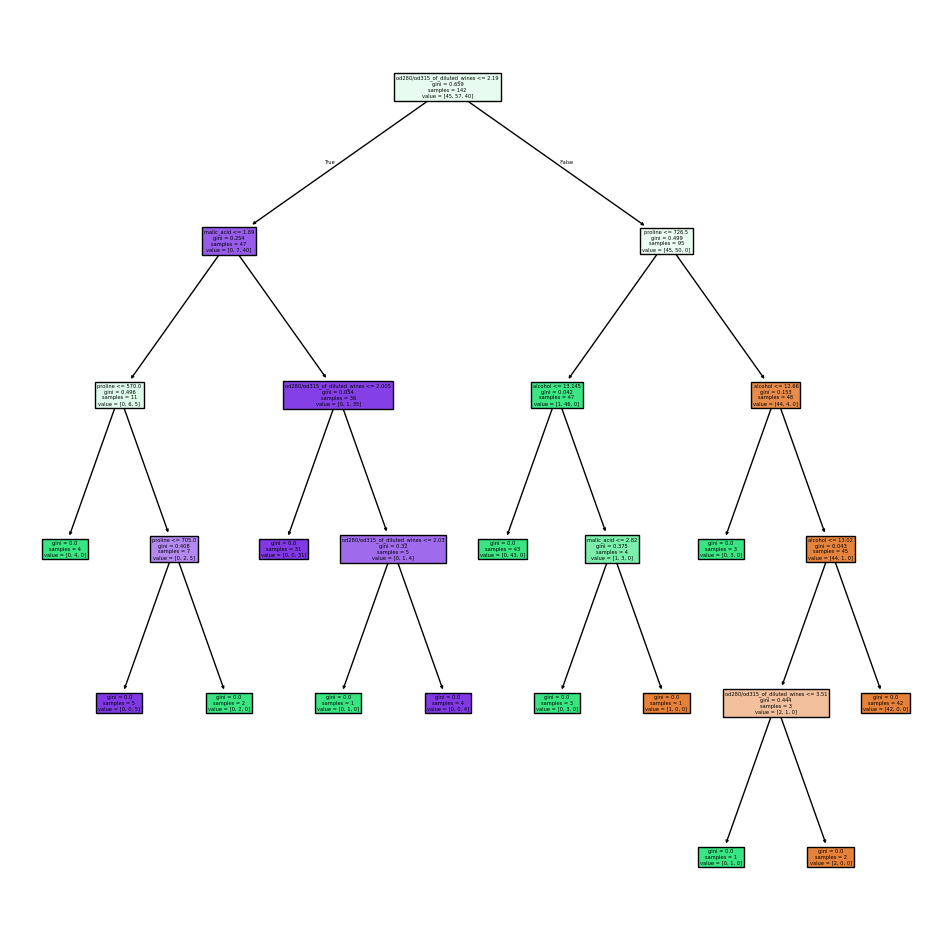

In [99]:
plt.figure(figsize=(12,12))
plot_tree(model, filled=True, feature_names=['alcohol', 'malic_acid','od280/od315_of_diluted_wines','proline'])